# PROCESS:
<h3>Logistic regression as model</h3>
<ol>
    <li> "Sentiment Analyzer"</li>
    <li> "Bigram _feature_selection 1"</li>
    <li>  "Bag of words _feature_selection 2" </li>
    <li> "TF-IDF _feature_selection 3"</li>
    
</ol>

# LIBRARIES

>1.Downloads

In [22]:
#fasttext
# Downloads

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

>2.imports

In [1]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize,word_tokenize
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import WordNetLemmatizer
from nltk import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from langdetect import detect
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Reading csv files

In [2]:
original_data = pd.read_csv('processed_data.csv')

In [3]:
original_data

,Song_title,Release_year,Duration_in_seconds,artist_name,Playlist_name,processed_lyrics
0,Lovin On Me,2023,138,Jack Harlow,Today’s Top Hits,like whips chains tie whip lovin baby whip lov...
1,greedy,2023,131,Tate McRae,Today’s Top Hits,​greedy said serious tried figure next night s...
2,Agora Hills,2023,265,Doja Cat,Today’s Top Hits,hills kissin hope caught us whether like show ...
3,Houdini,2023,185,Dua Lipa,Today’s Top Hits,okay come go tell ways need long catch go houd...
4,Strangers,2023,172,Kenya Grace,Today’s Top Hits,always ends every time meet somebody new like ...
...,...,...,...,...,...,...
1001,We Ride,2023,188,Bryan Martin,Chillin' on a Dirt Road,contributorswe ride well known write songs lov...
1002,Out Of That Truck,2023,177,Carrie Underwood,Chillin' on a Dirt Road,contributorsout truck bet shotgun headrest sti...
1003,Man! I Feel Like A Woman!,1997,234,Shania Twain,90s Country,37 contributorsman feel like woman lets go gir...
1004,Sweet Home Alabama,1974,283,Lynyrd Skynyrd,Southern Rock,129 contributorssweet home alabama one two thr...


In [4]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Song_title           1006 non-null   object
 1   Release_year         1006 non-null   int64 
 2   Duration_in_seconds  1006 non-null   int64 
 3   artist_name          1006 non-null   object
 4   Playlist_name        1006 non-null   object
 5   processed_lyrics     1006 non-null   object
dtypes: int64(2), object(4)
memory usage: 47.3+ KB


In [5]:

data_exploded = original_data['processed_lyrics'].explode().reset_index(drop=True)
data_exploded = data_exploded.rename('Word')

In [6]:
data_exploded = data_exploded.reset_index(drop=True)
data_exploded.index = data_exploded.index + 1
print(data_exploded)

1       like whips chains tie whip lovin baby whip lov...
2       ​greedy said serious tried figure next night s...
3       hills kissin hope caught us whether like show ...
4       okay come go tell ways need long catch go houd...
5       always ends every time meet somebody new like ...
                              ...                        
1002    contributorswe ride well known write songs lov...
1003    contributorsout truck bet shotgun headrest sti...
1004    37 contributorsman feel like woman lets go gir...
1005    129 contributorssweet home alabama one two thr...
1006    30 contributorshard handle baby man scene give...
Name: Word, Length: 1006, dtype: object


In [7]:
data_exploded = data_exploded.apply(str)
word_series = data_exploded
print(word_series)

1       like whips chains tie whip lovin baby whip lov...
2       ​greedy said serious tried figure next night s...
3       hills kissin hope caught us whether like show ...
4       okay come go tell ways need long catch go houd...
5       always ends every time meet somebody new like ...
                              ...                        
1002    contributorswe ride well known write songs lov...
1003    contributorsout truck bet shotgun headrest sti...
1004    37 contributorsman feel like woman lets go gir...
1005    129 contributorssweet home alabama one two thr...
1006    30 contributorshard handle baby man scene give...
Name: Word, Length: 1006, dtype: object


In [8]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
def get_sentiment(word):
    sentiment = sia.polarity_scores(word)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
word_series = pd.DataFrame(word_series, columns=['Word'])
word_series['POS'] = word_series['Word'].apply(lambda word: nltk.pos_tag([word])[0][1])
word_series['Sentiment'] = word_series['Word'].apply(get_sentiment)
print(word_series)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                   Word  POS Sentiment
1     like whips chains tie whip lovin baby whip lov...   NN  negative
2     ​greedy said serious tried figure next night s...  NNS  negative
3     hills kissin hope caught us whether like show ...   NN  positive
4     okay come go tell ways need long catch go houd...  NNS  positive
5     always ends every time meet somebody new like ...  NNS  positive
...                                                 ...  ...       ...
1002  contributorswe ride well known write songs lov...   NN  negative
1003  contributorsout truck bet shotgun headrest sti...   NN  positive
1004  37 contributorsman feel like woman lets go gir...   CD  positive
1005  129 contributorssweet home alabama one two thr...   CD  positive
1006  30 contributorshard handle baby man scene give...   CD  positive

[1006 rows x 3 columns]


In [10]:
sentiment_counts = word_series['Sentiment'].value_counts()
print(sentiment_counts)

positive    599
negative    395
neutral      12
Name: Sentiment, dtype: int64


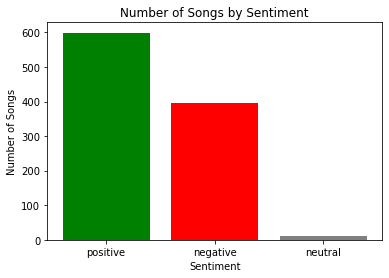

In [11]:
sentiment_counts = word_series['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])

plt.xlabel('Sentiment')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Sentiment')

plt.show()


In [12]:
positive_duplicates = word_series[word_series['Sentiment'] == 'positive']['Word'].duplicated().sum()
print("Duplicate words in Positive sentiment:", positive_duplicates)


Duplicate words in Positive sentiment: 218


In [13]:
negative_duplicates = word_series[word_series['Sentiment'] == 'negative']['Word'].duplicated().sum()
print("Duplicate words in Negative sentiment:", negative_duplicates)


Duplicate words in Negative sentiment: 191


In [14]:
neutral_duplicates = word_series[word_series['Sentiment'] == 'neutral']['Word'].duplicated().sum()
print("Duplicate words in Neutral sentiment:", neutral_duplicates)


Duplicate words in Neutral sentiment: 6


In [15]:
positive_unique_words = word_series[word_series['Sentiment'] == 'positive'].drop_duplicates(subset='Word')
negative_unique_words = word_series[word_series['Sentiment'] == 'negative'].drop_duplicates(subset='Word')
neutral_unique_words = word_series[word_series['Sentiment'] == 'neutral'].drop_duplicates(subset='Word')


In [16]:
word_series = pd.concat([word_series, positive_unique_words, negative_unique_words, neutral_unique_words], ignore_index=True)
word_series = word_series.drop_duplicates(subset='Word')
word_series.reset_index(drop=True, inplace=True)

print(word_series)

                                                  Word  POS Sentiment
0    like whips chains tie whip lovin baby whip lov...   NN  negative
1    ​greedy said serious tried figure next night s...  NNS  negative
2    hills kissin hope caught us whether like show ...   NN  positive
3    okay come go tell ways need long catch go houd...  NNS  positive
4    always ends every time meet somebody new like ...  NNS  positive
..                                                 ...  ...       ...
586  25 contributorslive let die young heart open b...   CD  negative
587  mr boombastic want boombastic romantic fantast...  NNS  positive
588  74 contributorsgettin jiggy wit wooooo haha ha...   CD  positive
589  28 contributorslearning fly well started dirty...   CD  positive
590  22 contributorsshe high shes blood flesh bone ...   CD  positive

[591 rows x 3 columns]


In [17]:
sentiment_counts = word_series['Sentiment'].value_counts()
print(sentiment_counts)


positive    381
negative    204
neutral       6
Name: Sentiment, dtype: int64


In [18]:
word_series = word_series[word_series['Sentiment'] != 'neutral']
word_series.reset_index(drop=True, inplace=True)
print(word_series)

                                                  Word  POS Sentiment
0    like whips chains tie whip lovin baby whip lov...   NN  negative
1    ​greedy said serious tried figure next night s...  NNS  negative
2    hills kissin hope caught us whether like show ...   NN  positive
3    okay come go tell ways need long catch go houd...  NNS  positive
4    always ends every time meet somebody new like ...  NNS  positive
..                                                 ...  ...       ...
580  25 contributorslive let die young heart open b...   CD  negative
581  mr boombastic want boombastic romantic fantast...  NNS  positive
582  74 contributorsgettin jiggy wit wooooo haha ha...   CD  positive
583  28 contributorslearning fly well started dirty...   CD  positive
584  22 contributorsshe high shes blood flesh bone ...   CD  positive

[585 rows x 3 columns]


In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encoding the "Sentiment" column in word_series
word_series['Sentiment'] = label_encoder.fit_transform(word_series['Sentiment'])



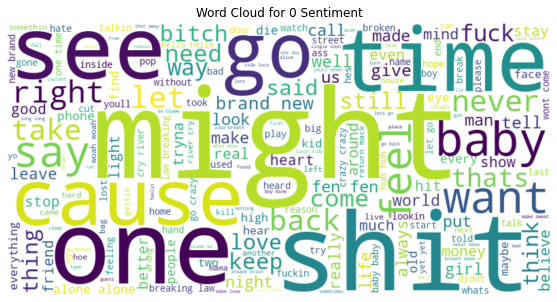

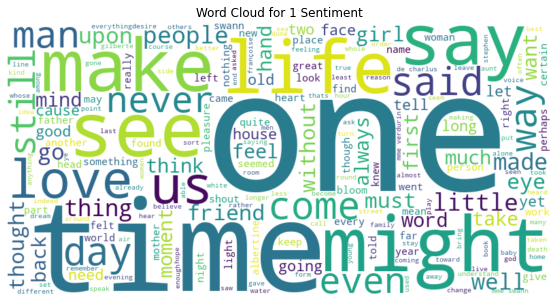

In [20]:
sentiments = word_series['Sentiment'].unique()

for sentiment in sentiments:

    sentiment_words = word_series[word_series['Sentiment'] == sentiment]

    text = ' '.join(sentiment_words['Word'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

# bow

In [21]:
X = word_series['Word']
y = word_series['Sentiment']

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

vectorizer = CountVectorizer(ngram_range=(1, 4), max_features=500000)
vectorizer.fit(X_train)
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_bow, y_train)
y_pred = logistic_model.predict(X_test_bow)
report = classification_report(y_test, y_pred, zero_division=0)
print(report)


              precision    recall  f1-score   support

           0       0.59      0.19      0.29        88
           1       0.65      0.92      0.76       146

    accuracy                           0.65       234
   macro avg       0.62      0.56      0.53       234
weighted avg       0.63      0.65      0.59       234



# TFIDF

In [23]:
X = word_series['Word']
y = word_series['Sentiment']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 4), max_features=500000)
tfidf_vectorizer.fit(X_train)


TfidfVectorizer(max_features=500000, ngram_range=(1, 4))

In [25]:
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [26]:
logistic_model_tfidf = LogisticRegression()
logistic_model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = logistic_model_tfidf.predict(X_test_tfidf)


In [27]:
report_tfidf = classification_report(y_test, y_pred_tfidf, zero_division=0)
print(report_tfidf)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.62      1.00      0.77       146

    accuracy                           0.62       234
   macro avg       0.31      0.50      0.38       234
weighted avg       0.39      0.62      0.48       234



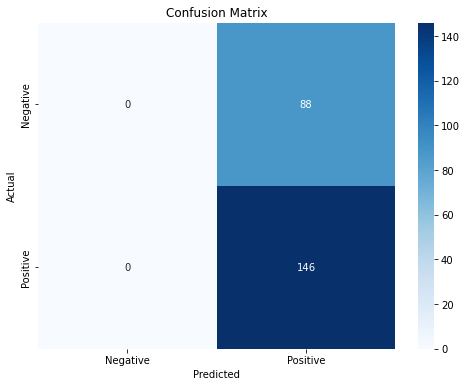

In [28]:

confusion = confusion_matrix(y_test, y_pred_tfidf)
class_names = ['Negative', 'Positive']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# BIGRAM

In [29]:
X = word_series['Word']
y = word_series['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [30]:
count_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=500000)
X_train_bg = count_vectorizer.fit_transform(X_train)
X_test_bg = count_vectorizer.transform(X_test)


In [31]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_count, y_train)

y_pred_bigram = logistic_model.predict(X_test_bg)

NameError: name 'X_train_count' is not defined

In [ ]:
report_bigram = classification_report(y_test, y_pred_count, zero_division=0)
print(report_bigram)


In [ ]:

confusion = confusion_matrix(y_test, y_pred_count)
class_names = ['Negative', 'Positive']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print("Classification Report for BOW:")
print(report)
print("\nClassification Report for TF-IDF:")
print(report_tfidf)
print("\nClassification Report for Bigrams:")
print(report_bigram)
